<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle
from sklearn.preprocessing import StandardScaler
# Result Analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
genres = os.listdir('input/genres_1/')

genres_sorted = sorted(genres, key=lambda x: int(x[1:]))

print(genres_sorted)

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25']


In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [6]:
# Write the header to the CSV file
file_path = 'NumericalAudioData_1.csv'
try:
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
except IOError as e:
    print(f"Error opening or writing to file: {e}")

# List of genres
genres = 'M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25'.split()

print("genres:", genres)

# Process each genre and each file in the genre
for g in genres:
    genre_path = f'input/genres_1/{g}'
    if not os.path.isdir(genre_path):
        print(f"Directory not found: {genre_path}")
        continue
    
    for filename in os.listdir(genre_path):
        songname = os.path.join(genre_path, filename)
        print("songname:", songname)
        
        try:
            # Load the audio file
            y, sr = librosa.load(songname, mono=True, duration=30)
            
            # Extract features
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            
            # Prepare the row to append
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {g}'
            
            # Append the row to the CSV file
            try:
                with open(file_path, 'a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())
            except IOError as e:
                print(f"Error appending to file: {e}")
        
        except Exception as e:
            print(f"Error processing file {songname}: {e}")

print("Processing complete.")


genres: ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25']
songname: input/genres_1/M1\M1(1).wav
songname: input/genres_1/M1\M1(2).wav
songname: input/genres_1/M1\M1(3).wav
songname: input/genres_1/M1\M1(4).wav
songname: input/genres_1/M1\M1(5).wav
songname: input/genres_1/M1\M1(6).wav
songname: input/genres_1/M1\M1(7).wav
songname: input/genres_1/M1\M1(8).wav
songname: input/genres_1/M1\M1(9).wav
songname: input/genres_1/M2\M2(1).wav
songname: input/genres_1/M2\M2(10).wav
songname: input/genres_1/M2\M2(11).wav
songname: input/genres_1/M2\M2(12).wav
songname: input/genres_1/M2\M2(13).wav
songname: input/genres_1/M2\M2(2).wav
songname: input/genres_1/M2\M2(3).wav
songname: input/genres_1/M2\M2(4).wav
songname: input/genres_1/M2\M2(5).wav
songname: input/genres_1/M2\M2(6).wav
songname: input/genres_1/M2\M2(7).wav
songname: input/genres_1/M2\M2(8).wav
songname: input/genres_

songname: input/genres_1/M21\M21(1).wav
songname: input/genres_1/M21\M21(10).wav
songname: input/genres_1/M21\M21(2).wav
songname: input/genres_1/M21\M21(3).wav
songname: input/genres_1/M21\M21(4).wav
songname: input/genres_1/M21\M21(5).wav
songname: input/genres_1/M21\M21(6).wav
songname: input/genres_1/M21\M21(7).wav
songname: input/genres_1/M21\M21(8).wav
songname: input/genres_1/M21\M21(9).wav
songname: input/genres_1/M22\M22(1).wav
songname: input/genres_1/M22\M22(2).wav
songname: input/genres_1/M22\M22(3).wav
songname: input/genres_1/M22\M22(4).wav
songname: input/genres_1/M22\M22(5).wav
songname: input/genres_1/M22\M22(6).wav
songname: input/genres_1/M22\M22(7).wav
songname: input/genres_1/M22\M22(8).wav
songname: input/genres_1/M22\M22(9).wav
songname: input/genres_1/M23\M23(1).wav
songname: input/genres_1/M23\M23(10).wav
songname: input/genres_1/M23\M23(11).wav
songname: input/genres_1/M23\M23(2).wav
songname: input/genres_1/M23\M23(3).wav
songname: input/genres_1/M23\M23(4).w

<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [7]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData_1.csv')
data.head()

filename  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0  M1(1).wav     0.238488  0.083276        1242.340169         1383.417808   
1  M1(2).wav     0.241128  0.112799        1695.500069         1899.096753   
2  M1(3).wav     0.318982  0.020743        1827.633520         1833.163709   
3  M1(4).wav     0.212414  0.073962        2169.672346         2161.321946   
4  M1(5).wav     0.230082  0.050568        1684.333572         1829.643941   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  ...  \
0  2174.136853            0.068729 -284.045807  141.135239 -21.163836  ...   
1  3040.189950            0.084507 -192.153152  101.925018 -31.456619  ...   
2  3612.461489            0.084439 -353.160736  107.619652 -37.818237  ...   
3  4247.640982            0.085397 -217.985245   69.280075 -39.979507  ...   
4  2631.434088            0.094652 -338.386169  108.554459 -33.694111  ...   

      mfcc12     mfcc13     mfcc14     mfcc15    mfcc16     mfcc17    mfcc18  \
0 -29.556786   7.144430  -0.657712   1.763511  3.174584  -6.601313 -7.915104   
1 -10.167237   1.487521  12.301415 -11.513089  0.691031   5.024289  6.390421   
2  -5.141618  -5.092138 -11.754651  -5.685144  8.488720  -9.555749  2.957926   
3   1.975145  -8.747527  11.015077  -8.880787 -4.073452  -6.100463  3.738625   
4 -15.468699 -16.042923   7.158023 -23.038960  0.883553 -13.163644  2.312249   

      mfcc19     mfcc20  label  
0  -9.406194  -6.453637     M1  
1  -4.318320  11.602271     M1  
2  -2.407405  -3.943414     M1  
3 -11.407726  -2.676183     M1  
4 -10.513357  -6.732892     M1  

[5 rows x 28 columns]

In [8]:
print(data.shape)

(255, 28)


In [9]:
data["label"].value_counts()

M2     13
M11    11
M3     11
M19    11
M23    11
M16    11
M15    11
M14    11
M12    11
M21    10
M25    10
M10    10
M9     10
M24    10
M7     10
M6     10
M5     10
M4     10
M20    10
M22     9
M1      9
M18     9
M17     9
M8      9
M13     9
Name: label, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

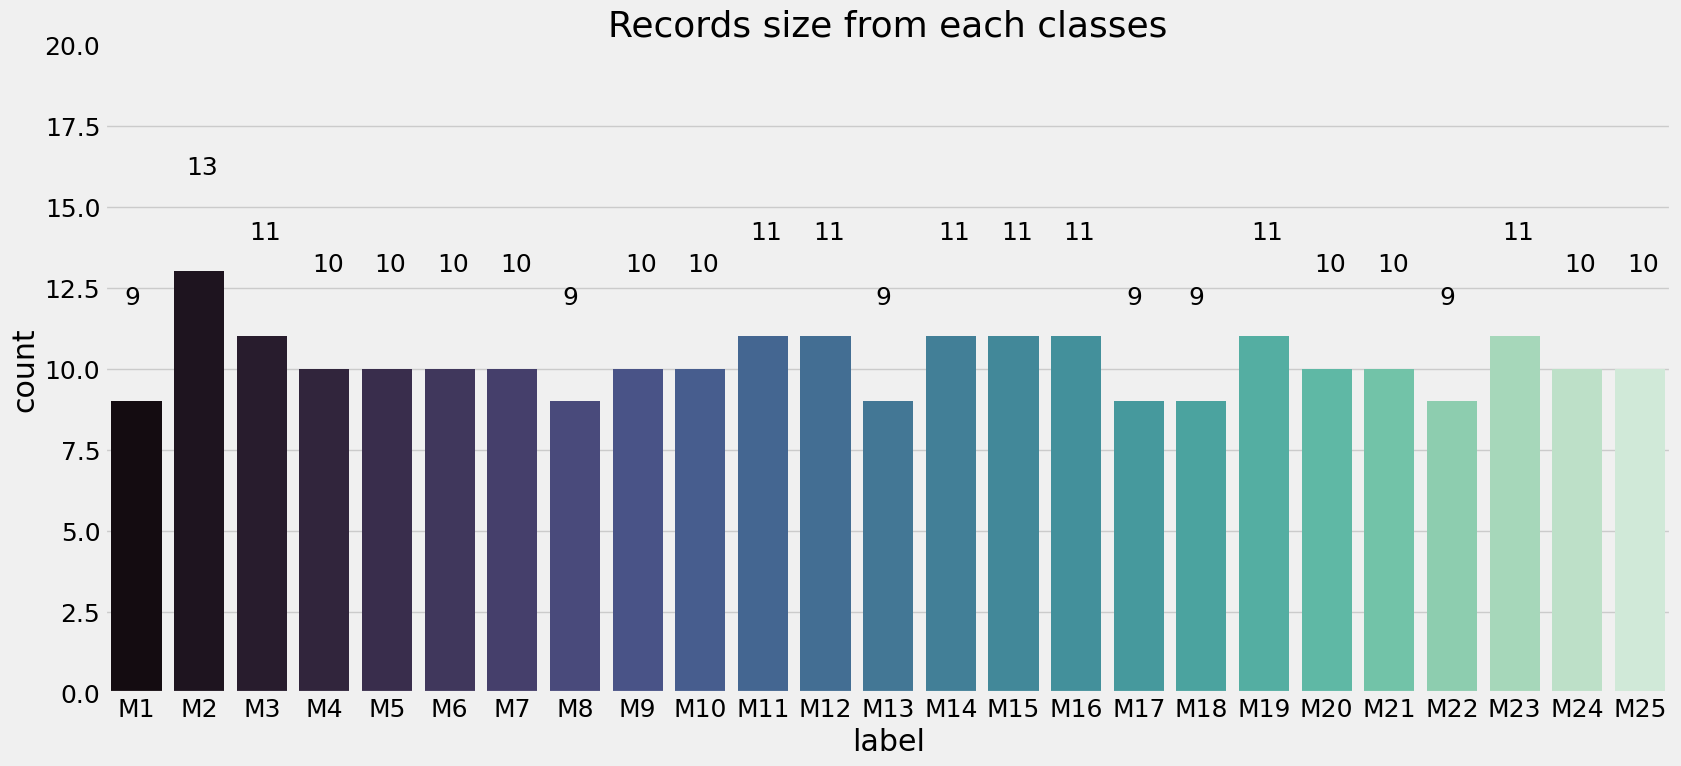

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=data, palette="mako")
    plt.title(label="Records size from each classes")
    plt.ylim(0,20)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

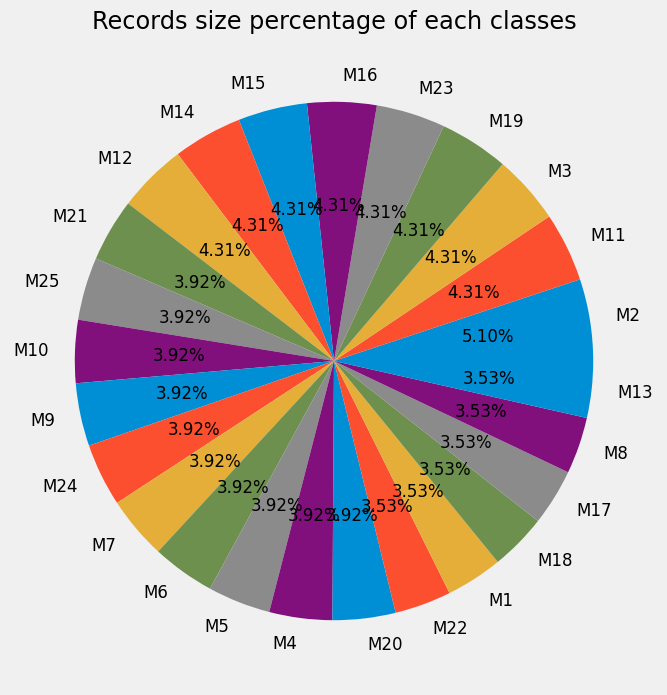

In [11]:
chart_data = dict(data['label'].value_counts())

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%")
    plt.title(label="Records size percentage of each classes")
    plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(255, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         255 non-null    float64
 1   rmse                255 non-null    float64
 2   spectral_centroid   255 non-null    float64
 3   spectral_bandwidth  255 non-null    float64
 4   rolloff             255 non-null    float64
 5   zero_crossing_rate  255 non-null    float64
 6   mfcc1               255 non-null    float64
 7   mfcc2               255 non-null    float64
 8   mfcc3               255 non-null    float64
 9   mfcc4               255 non-null    float64
 10  mfcc5               255 non-null    float64
 11  mfcc6               255 non-null    float64
 12  mfcc7               255 non-null    float64
 13  mfcc8               255 non-null    float64
 14  mfcc9               255 non-null    float64
 15  mfcc10              255 non-null    float64
 16  mfcc11  

In [15]:
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.238488  0.083276        1242.340169         1383.417808  2174.136853   
1     0.241128  0.112799        1695.500069         1899.096753  3040.189950   
2     0.318982  0.020743        1827.633520         1833.163709  3612.461489   
3     0.212414  0.073962        2169.672346         2161.321946  4247.640982   
4     0.230082  0.050568        1684.333572         1829.643941  2631.434088   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.068729 -284.045807  141.135239 -21.163836  -1.707885  ...   
1            0.084507 -192.153152  101.925018 -31.456619  -7.964826  ...   
2            0.084439 -353.160736  107.619652 -37.818237  36.086227  ...   
3            0.085397 -217.985245   69.280075 -39.979507  26.406437  ...   
4            0.094652 -338.386169  108.554459 -33.694111 -15.979538  ...   

      mfcc12     mfcc13     mfcc14     mfcc15    mfcc16     mfcc17    mfcc18  \
0 -29.556786   7.144430  -0.657712   1.763511  3.174584  -6.601313 -7.915104   
1 -10.167237   1.487521  12.301415 -11.513089  0.691031   5.024289  6.390421   
2  -5.141618  -5.092138 -11.754651  -5.685144  8.488720  -9.555749  2.957926   
3   1.975145  -8.747527  11.015077  -8.880787 -4.073452  -6.100463  3.738625   
4 -15.468699 -16.042923   7.158023 -23.038960  0.883553 -13.163644  2.312249   

      mfcc19     mfcc20  label  
0  -9.406194  -6.453637     M1  
1  -4.318320  11.602271     M1  
2  -2.407405  -3.943414     M1  
3 -11.407726  -2.676183     M1  
4 -10.513357  -6.732892     M1  

[5 rows x 27 columns]

In [16]:
class_labels = data["label"].unique().tolist()
class_labels.sort()

print(class_labels)

['M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M2', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [17]:
oversampled = []

for label in class_labels:
    label_df = data.loc[data["label"] == label]
    oversampled_df = resample(label_df, n_samples=100)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.190271  0.091285        1733.730260         1633.993531  3293.596751   
1     0.177375  0.174149        1942.077629         2015.154253  3689.502690   
2     0.164438  0.010669         699.731890          732.000063  1022.277152   
3     0.321750  0.114719        1493.532830         1624.733251  2703.033655   
4     0.321750  0.114719        1493.532830         1624.733251  2703.033655   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.086196 -247.822906   71.686638 -28.579082  32.223953  ...   
1            0.089400 -162.230453   83.922035 -27.538891   1.310542  ...   
2            0.047798 -544.982788  145.061539  20.361477   1.598550  ...   
3            0.075033 -192.034409  131.114182 -12.812370  37.955830  ...   
4            0.075033 -192.034409  131.114182 -12.812370  37.955830  ...   

      mfcc12     mfcc13     mfcc14    mfcc15    mfcc16    mfcc17     mfcc18  \
0 -13.748961 -11.995909   3.437763 -4.779210 -1.287399  1.282458   0.454296   
1   2.477251 -14.382081   2.801022 -5.053547  7.812679  3.713275  14.884316   
2   2.656818  14.236235  17.469133  7.549679 -4.990068 -8.563120  -7.351161   
3  -2.625032  -6.592497   0.345586 -0.289941  2.047363 -7.753568   3.536471   
4  -2.625032  -6.592497   0.345586 -0.289941  2.047363 -7.753568   3.536471   

     mfcc19    mfcc20  label  
0 -5.786928  5.899948    M18  
1  9.215435  6.970335    M22  
2 -7.770097 -5.673121    M13  
3 -1.412813 -8.552197    M22  
4 -1.412813 -8.552197    M22  

[5 rows x 27 columns]

In [18]:
df.shape

(2500, 27)

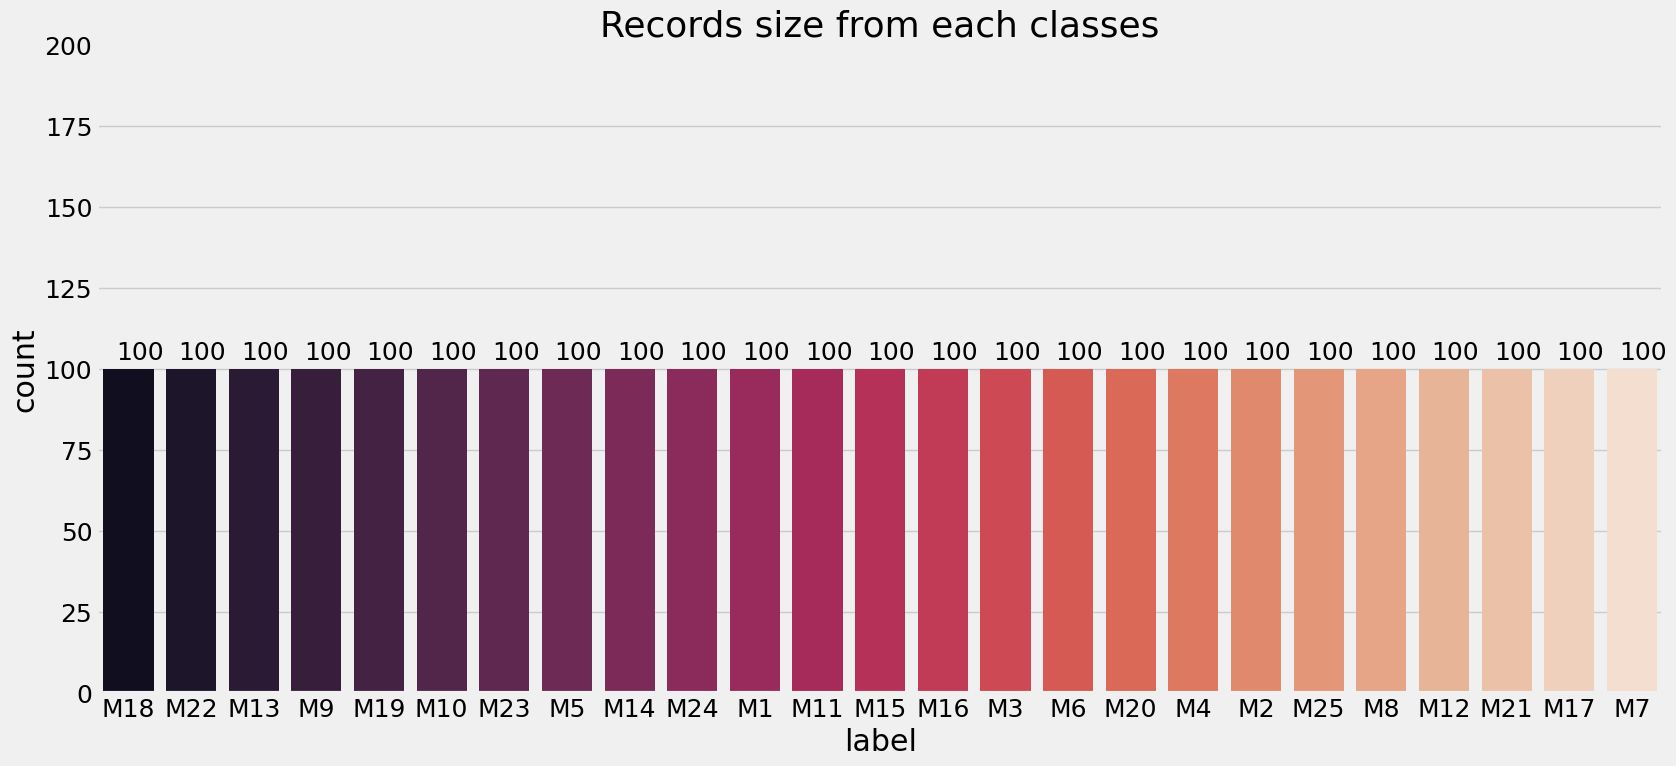

In [19]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=df, palette="rocket")
    plt.title(label="Records size from each classes")
    plt.ylim(0,200)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

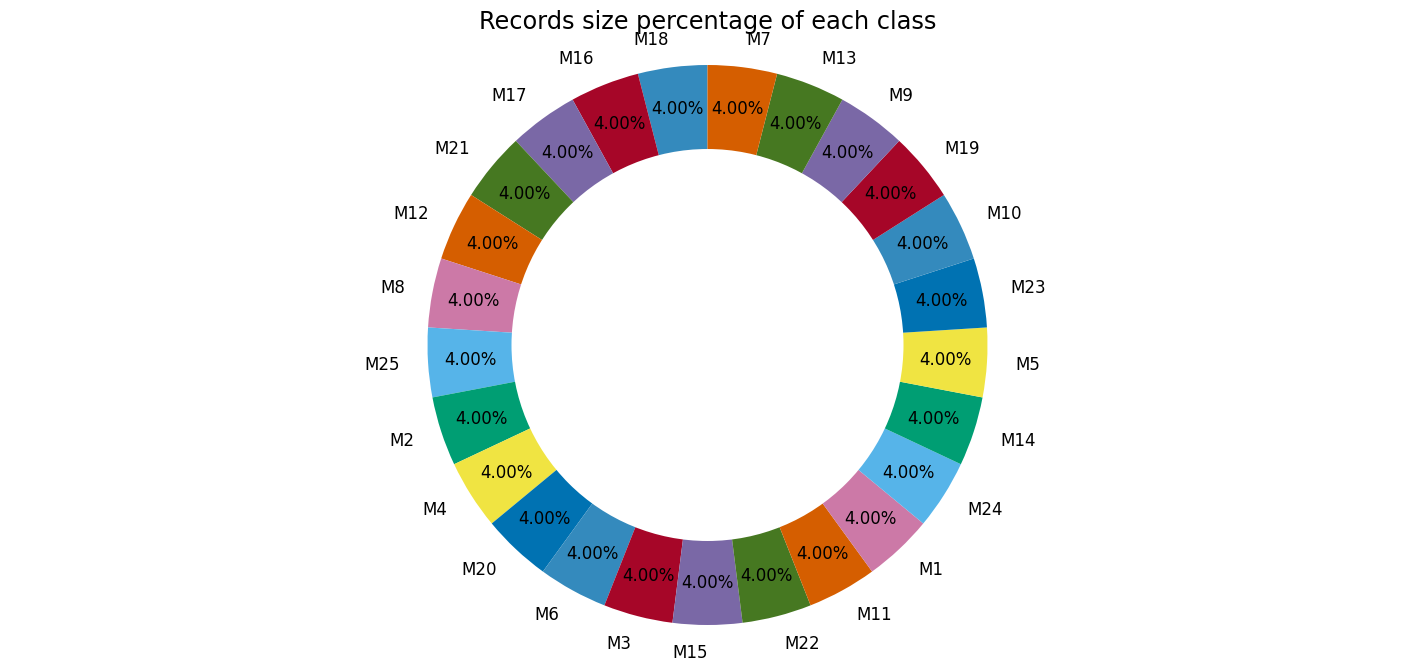

In [20]:
chart_data = dict(df['label'].value_counts())

with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams["font.size"] = 12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%", startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(label="Records size percentage of each class")
    plt.show()

In [21]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.190271  0.091285        1733.730260         1633.993531  3293.596751   
1     0.177375  0.174149        1942.077629         2015.154253  3689.502690   
2     0.164438  0.010669         699.731890          732.000063  1022.277152   
3     0.321750  0.114719        1493.532830         1624.733251  2703.033655   
4     0.321750  0.114719        1493.532830         1624.733251  2703.033655   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.086196 -247.822906   71.686638 -28.579082  32.223953  ...   
1            0.089400 -162.230453   83.922035 -27.538891   1.310542  ...   
2            0.047798 -544.982788  145.061539  20.361477   1.598550  ...   
3            0.075033 -192.034409  131.114182 -12.812370  37.955830  ...   
4            0.075033 -192.034409  131.114182 -12.812370  37.955830  ...   

      mfcc11     mfcc12     mfcc13     mfcc14    mfcc15    mfcc16    mfcc17  \
0 -10.789771 -13.748961 -11.995909   3.437763 -4.779210 -1.287399  1.282458   
1 -20.661722   2.477251 -14.382081   2.801022 -5.053547  7.812679  3.713275   
2  -5.129959   2.656818  14.236235  17.469133  7.549679 -4.990068 -8.563120   
3  -7.227085  -2.625032  -6.592497   0.345586 -0.289941  2.047363 -7.753568   
4  -7.227085  -2.625032  -6.592497   0.345586 -0.289941  2.047363 -7.753568   

      mfcc18    mfcc19    mfcc20  
0   0.454296 -5.786928  5.899948  
1  14.884316  9.215435  6.970335  
2  -7.351161 -7.770097 -5.673121  
3   3.536471 -1.412813 -8.552197  
4   3.536471 -1.412813 -8.552197  

[5 rows x 26 columns]

In [22]:
y = df[["label"]]
y.head(10)

label
0   M18
1   M22
2   M13
3   M22
4   M22
5    M9
6   M19
7   M10
8   M23
9   M23

In [23]:
scaler = StandardScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(scaled_X, columns=X.columns)
df['label'] = y.values.ravel()

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0    -1.077274 -0.022780           0.160251           -0.176752  0.171202   
1    -1.311452  1.423778           0.602030            0.743599  0.573670   
2    -1.546371 -1.430096          -2.032233           -2.354704 -2.137764   
3     1.310215  0.386300          -0.349062           -0.199111 -0.429149   
4     1.310215  0.386300          -0.349062           -0.199111 -0.429149   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0            0.091714  0.137204 -1.114363 -0.075803  0.912673  ... -1.470128   
1            0.191612  0.969949 -0.723623 -0.030854 -0.744836  ...  0.745694   
2           -1.105482 -2.753920  1.228881  2.039065 -0.729394  ...  0.770216   
3           -0.256338  0.679981  0.783469  0.605524  1.220004  ...  0.048936   
4           -0.256338  0.679981  0.783469  0.605524  1.220004  ...  0.048936   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0 -0.483515  0.648477  0.160760 -0.040482  1.006331  0.216581 -0.113119   
1 -0.818526  0.552750  0.115914  1.464191  1.395429  2.868493  2.793030   
2  3.199400  2.757942  2.176178 -0.652707 -0.569637 -1.217886 -0.497284   
3  0.275108  0.183602  0.894626  0.510912 -0.440053  0.783015  0.734203   
4  0.275108  0.183602  0.894626  0.510912 -0.440053  0.783015  0.734203   

     mfcc20  label  
0  1.038575    M18  
1  1.247451    M22  
2 -1.219805    M13  
3 -1.781631    M22  
4 -1.781631    M22  

[5 rows x 27 columns]

In [24]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         2500 non-null   float64
 1   rmse                2500 non-null   float64
 2   spectral_centroid   2500 non-null   float64
 3   spectral_bandwidth  2500 non-null   float64
 4   rolloff             2500 non-null   float64
 5   zero_crossing_rate  2500 non-null   float64
 6   mfcc1               2500 non-null   float64
 7   mfcc2               2500 non-null   float64
 8   mfcc3               2500 non-null   float64
 9   mfcc4               2500 non-null   float64
 10  mfcc5               2500 non-null   float64
 11  mfcc6               2500 non-null   float64
 12  mfcc7               2500 non-null   float64
 13  mfcc8               2500 non-null   float64
 14  mfcc9               2500 non-null   float64
 15  mfcc10              2500 non-null   float64
 16  mfcc11

AttributeError: module 'librosa' has no attribute 'display'

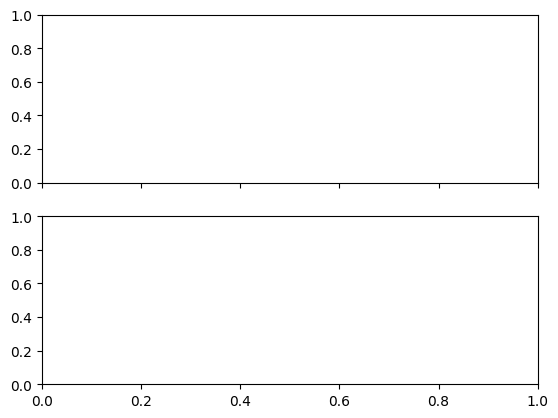

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

In [ ]:
class_dict = {}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx
    
print(class_dict)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

In [ ]:
df['label'] = df['label'].map(class_dict)
df.head()

In [ ]:
X = df.drop(labels="label", axis=1)
X.head()

In [ ]:
y = df[["label"]]
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_train.to_csv("splitted_data_A/X_train.csv", index=False)
X_test.to_csv("splitted_data_A/X_test.csv", index=False)
y_train.to_csv("splitted_data_A/y_train.csv", index=False)
y_test.to_csv("splitted_data_A/y_test.csv", index=False)

---